# Алгоритм k ближайших соседей

In [1]:
 # для поддержки устаревших функций

In [2]:
!pip install scikit-learn==1.1.3

In [3]:
import sklearn
print(sklearn.__version__)

1.1.3


In [4]:
import pandas as pd
import numpy as np

Алгоритм k ближайших соседей, возможно, является самым простым
алгоритмом машинного обучения. Построение модели заключается в 
*запоминании обучающего набора данных*. Для того, чтобы сделать 
прогноз для новой точки данных, алгоритм находит ближайшие к ней
точки обучающего набора, то есть находит «ближайших соседей».


# *Как работает*:

### Обучение:
- В случае классификации: Запоминаются все обучающие примеры.
- В случае регрессии: Запоминаются значения целевой переменной для всех обучающих примеров.

### Предсказание:
Для нового входного экземпляра данных находим k ближайших соседей из обучающего набора. Расстояние между объектами может быть измерено различными способами, например, евклидово расстояние.
- В случае классификации: Выбираем наиболее часто встречающийся класс среди k ближайших соседей.
- В случае регрессии: Вычисляем среднее значение (или другую меру центральной тенденции) целевой переменной для k ближайших соседей.

### Классификация

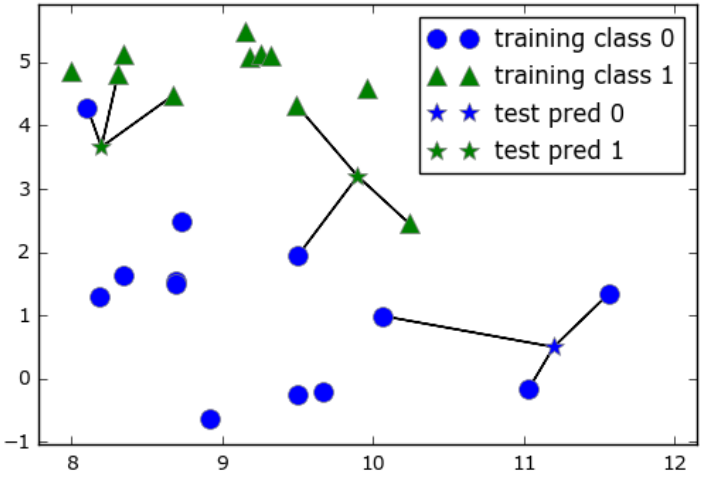

In [5]:
# загрузим набор данных об опухолях
from sklearn.datasets import load_breast_cancer

In [6]:
canser_info = load_breast_cancer()

In [7]:
print('КЛЮЧИ В ДАТАСЕТЕ:',canser_info.keys())
print()
print('ОПИСАНИЕ ДАТАСЕТА\n',canser_info.DESCR)

КЛЮЧИ В ДАТАСЕТЕ: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

ОПИСАНИЕ ДАТАСЕТА
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
 

In [8]:
data1 = canser_info.data
type(data1)
data1[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
data_canser = pd.DataFrame(canser_info.data,columns=canser_info.feature_names)
data_canser

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
target_data = pd.Series(canser_info.target)
target_data
target_data.value_counts()

1    357
0    212
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_canser, target_data)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()  # по умолчанию 5 соседей

In [13]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
print(f'Точность на тестовом наборе: {clf.score(np.array(X_test),np.array(y_test)):.3f}')
print(f'Точность на обучающем наборе: {clf.score(np.array(X_train),np.array(y_train)):.3f}')

C:\Users\dermi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Точность на тестовом наборе: 0.895
Точность на обучающем наборе: 0.955


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import sklearn
print(sklearn.__version__)

1.1.3


### Регрессия с помощью ближайших соседей

Основная идея KNN в регрессии заключается в том, чтобы предсказывать значение для нового объекта, основываясь на среднем или медианном значении целевой переменной среди его ближайших соседей.

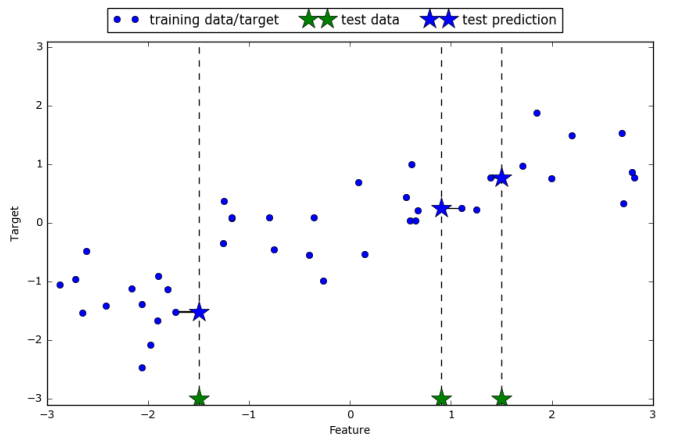

In [17]:
from sklearn.datasets import load_boston  # данные о цене домов в бостоне

In [18]:
boston_info = load_boston();

In [19]:
boston_info.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [20]:
boston_data = pd.DataFrame(boston_info.data, columns=boston_info.feature_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
boston_target = pd.DataFrame(boston_info.target, columns=['price'])
boston_target

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [22]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(boston_data,boston_target)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
kn_reg = KNeighborsRegressor(7)

kn_reg.fit(X_train_reg,y_train_reg)
kn_reg.score(X_test_reg, y_test_reg)  # R^2 - коэфф. детерминации

0.5931806561878281

Кроме того, мы можем оценить качество модели с помощью метода 
score, который для регрессионных моделей возвращает значение R^2
. R^2(R-квадрат), также известный как **коэффициент детерминации**, является 
показателем качества регрессионной модели и принимает значения от 0 
до 1. Значение 1 соответствует идеальной прогнозирующей способности, 
а значение 0 соответствует константе модели, которая лишь
предсказывает среднее значение ответов в обучающем наборе.

# **Как итог**

### В классификаторе KNeighbors *2* основных параметра:
- **количество соседей** (по умолчанию 5)

*Переобучение* происходит, когда значение k слишком маленькое, и модель слишком чувствительна к шуму и выбросам. Модель может "запоминать" данные, вместо того чтобы обобщать из них закономерности.

*Недообучение* происходит, когда значение k слишком велико, и модель слишком усредняет данные, игнорируя локальные закономерности.

- **мера расстояния** (по умолчанию евклидово), но для категориальных данных может пригодится манхэттэнское
----

### Преимущества:
- простой алгоритм, с которого можно начать классификацию 
- легкая интерпретация
- почти не нужно настраивать
- может создавать мета-параметры для входа в более сложный алгоритм

### Недостатки:
- плохо работает с данными, имеющими большое количсетво признаков (100+)
- плохо работает с  разреженными данными (когда подавляющая часть признаков нули)
- занимает больше времени на больших объёмах данных